In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SDSS Shapes Analysis

In [129]:
# open SDSS catalog

from astropy.table import Table
fpath = '../data/SDSS_Main/'
fname = 'sdss_vagc.hdf5'
t = Table.read(fpath+fname, path='data')

for colname in t.dtype.names:
    print(colname)

RA
DEC
Z
ZTYPE
FGOTMAIN
AB_DEV
AB_EXP
AB_ISO
PHI_ISO_DEG
PHI_DEV_DEG
PHI_EXP_DEG
ABSMAG_u0.1
ABSMAG_g0.1
ABSMAG_r0.1
ABSMAG_i0.1
ABSMAG_z0.1
FRACPSF


In [75]:
disks = t['FRACPSF'][:,2] < 0.8
ellipticals = t['FRACPSF'][:,2] >= 0.8

mask_1 = (t['ABSMAG_r0.1'] > -18) & (t['ABSMAG_r0.1'] <= -17)
mask_2 = (t['ABSMAG_r0.1'] > -19) & (t['ABSMAG_r0.1'] <= -18)
mask_3 = (t['ABSMAG_r0.1'] > -20) & (t['ABSMAG_r0.1'] <= -19)
mask_4 = (t['ABSMAG_r0.1'] > -21) & (t['ABSMAG_r0.1'] <= -20)
mask_5 = (t['ABSMAG_r0.1'] > -22) & (t['ABSMAG_r0.1'] <= -21)

N_1, N_2, N_3, N_4, N_5 = np.sum(mask_1), np.sum(mask_2), np.sum(mask_3), np.sum(mask_4), np.sum(mask_5)
print(N_1, N_2, N_3, N_4, N_5)

16205 40464 111172 187776 142809


In [98]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05, Tcmb0=2.7255)

vmax = cosmo.comoving_volume(t['Z']).value
vmax = vmax/np.mean(vmax)

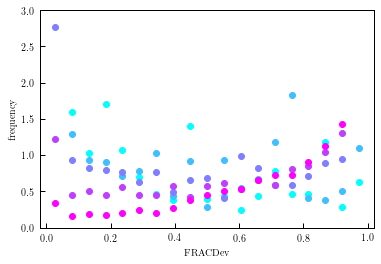

In [132]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

x_1 = t['FRACPSF'][:,2][mask_1]
x_2 = t['FRACPSF'][:,2][mask_2]
x_3 = t['FRACPSF'][:,2][mask_3]
x_4 = t['FRACPSF'][:,2][mask_4]
x_5 = t['FRACPSF'][:,2][mask_5]

w_1 = 1.0/(t['FGOTMAIN'][mask_1]*vmax[mask_1])
w_2 = 1.0/(t['FGOTMAIN'][mask_2]*vmax[mask_2])
w_3 = 1.0/(t['FGOTMAIN'][mask_3]*vmax[mask_3])
w_4 = 1.0/(t['FGOTMAIN'][mask_4]*vmax[mask_4])
w_5 = 1.0/(t['FGOTMAIN'][mask_5]*vmax[mask_5])

counts_1 = np.histogram(x_1, weights=w_1, bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(w_1)/np.diff(bins)

counts_2 = np.histogram(x_2, weights=w_2, bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(w_2)/np.diff(bins)

counts_3 = np.histogram(x_3, weights=w_3, bins=bins)[0]
counts_3 = 1.0*counts_3/np.sum(w_3)/np.diff(bins)

counts_4 = np.histogram(x_4, weights=w_4, bins=bins)[0]
counts_4 = 1.0*counts_4/np.sum(w_4)/np.diff(bins)

counts_5 = np.histogram(x_5, weights=w_5, bins=bins)[0]
counts_5 = 1.0*counts_5/np.sum(w_5)/np.diff(bins)



plt.figure()
plt.plot(bin_centers, counts_1, 'o', color=colors[0])
plt.plot(bin_centers, counts_2, 'o', color=colors[1])
plt.plot(bin_centers, counts_3, 'o', color=colors[2])
plt.plot(bin_centers, counts_4, 'o', color=colors[3])
plt.plot(bin_centers, counts_5, 'o', color=colors[4])
plt.xlabel(r'FRACDev')
plt.ylabel('frequency')
plt.ylim([0,3])
plt.show()

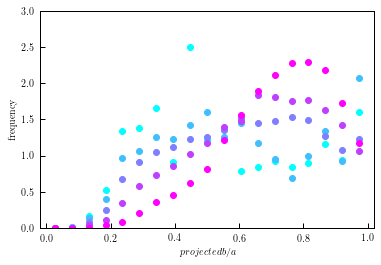

In [124]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

shape_key = 'AB_ISO'  # AB_EXP AB_DEV AB_ISO

x_1 = t[shape_key][mask_1]
x_2 = t[shape_key][mask_2]
x_3 = t[shape_key][mask_3]
x_4 = t[shape_key][mask_4]
x_5 = t[shape_key][mask_5]

w_1 = 1.0/(t['FGOTMAIN'][mask_1]*vmax[mask_1])
w_2 = 1.0/(t['FGOTMAIN'][mask_2]*vmax[mask_2])
w_3 = 1.0/(t['FGOTMAIN'][mask_3]*vmax[mask_3])
w_4 = 1.0/(t['FGOTMAIN'][mask_4]*vmax[mask_4])
w_5 = 1.0/(t['FGOTMAIN'][mask_5]*vmax[mask_5])

counts_1 = np.histogram(x_1, weights=w_1, bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(w_1)/np.diff(bins)

counts_2 = np.histogram(x_2, weights=w_2, bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(w_2)/np.diff(bins)

counts_3 = np.histogram(x_3, weights=w_3, bins=bins)[0]
counts_3 = 1.0*counts_3/np.sum(w_3)/np.diff(bins)

counts_4 = np.histogram(x_4, weights=w_4, bins=bins)[0]
counts_4 = 1.0*counts_4/np.sum(w_4)/np.diff(bins)

counts_5 = np.histogram(x_5, weights=w_5, bins=bins)[0]
counts_5 = 1.0*counts_5/np.sum(w_5)/np.diff(bins)

colors = plt.cm.cool(np.linspace(0,1,5))

plt.figure()
plt.plot(bin_centers, counts_1, 'o', color=colors[0])
plt.plot(bin_centers, counts_2, 'o', color=colors[1])
plt.plot(bin_centers, counts_3, 'o', color=colors[2])
plt.plot(bin_centers, counts_4, 'o', color=colors[3])
plt.plot(bin_centers, counts_5, 'o', color=colors[4])
plt.xlabel(r'$projected b/a$')
plt.ylabel('frequency')
plt.ylim([0,3])
plt.show()

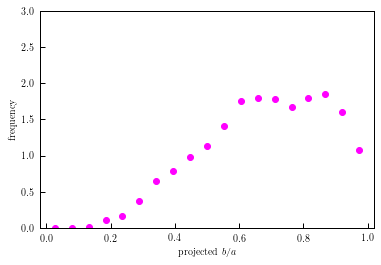

In [137]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

shape_key = 'AB_ISO'  # AB_EXP AB_DEV AB_ISO

x_1 = t[shape_key][mask_1 & disks]
x_2 = t[shape_key][mask_2 & disks]
x_3 = t[shape_key][mask_3 & disks]
x_4 = t[shape_key][mask_4 & disks]
x_5 = t[shape_key][mask_5 & disks]

w_1 = 1.0/(t['FGOTMAIN'][mask_1 & disks] * vmax[mask_1 & disks])
w_2 = 1.0/(t['FGOTMAIN'][mask_2 & disks] * vmax[mask_2 & disks])
w_3 = 1.0/(t['FGOTMAIN'][mask_3 & disks] * vmax[mask_3 & disks])
w_4 = 1.0/(t['FGOTMAIN'][mask_4 & disks] * vmax[mask_4 & disks])
w_5 = 1.0/(t['FGOTMAIN'][mask_5 & disks] * vmax[mask_5 & disks])

counts_1 = np.histogram(x_1, weights=w_1, bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(w_1)/np.diff(bins)

counts_2 = np.histogram(x_2, weights=w_2, bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(w_2)/np.diff(bins)

counts_3 = np.histogram(x_3, weights=w_3, bins=bins)[0]
counts_3 = 1.0*counts_3/np.sum(w_3)/np.diff(bins)

counts_4 = np.histogram(x_4, weights=w_4, bins=bins)[0]
counts_4 = 1.0*counts_4/np.sum(w_4)/np.diff(bins)

counts_5 = np.histogram(x_5, weights=w_5, bins=bins)[0]
counts_5 = 1.0*counts_5/np.sum(w_5)/np.diff(bins)

colors = plt.cm.cool(np.linspace(0,1,5))

plt.figure()
#plt.plot(bin_centers, counts_1, 'o', color=colors[0])
#plt.plot(bin_centers, counts_2, 'o', color=colors[1])
#plt.plot(bin_centers, counts_3, 'o', color=colors[2])
#plt.plot(bin_centers, counts_4, 'o', color=colors[3])
plt.plot(bin_centers, counts_5, 'o', color=colors[4])
plt.xlabel(r'projected $b/a$')
plt.ylabel(r'frequency')
plt.ylim([0,3])
plt.show()

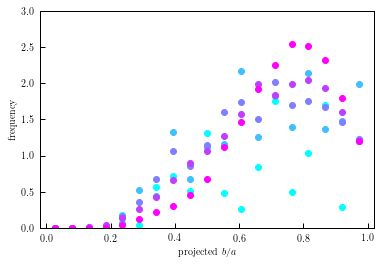

In [131]:
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

shape_key = 'AB_ISO'  # AB_EXP AB_DEV AB_ISO

x_1 = t[shape_key][mask_1 & ellipticals]
x_2 = t[shape_key][mask_2 & ellipticals]
x_3 = t[shape_key][mask_3 & ellipticals]
x_4 = t[shape_key][mask_4 & ellipticals]
x_5 = t[shape_key][mask_5 & ellipticals]

w_1 = 1.0/(t['FGOTMAIN'][mask_1 & ellipticals] * vmax[mask_1 & ellipticals])
w_2 = 1.0/(t['FGOTMAIN'][mask_2 & ellipticals] * vmax[mask_2 & ellipticals])
w_3 = 1.0/(t['FGOTMAIN'][mask_3 & ellipticals] * vmax[mask_3 & ellipticals])
w_4 = 1.0/(t['FGOTMAIN'][mask_4 & ellipticals] * vmax[mask_4 & ellipticals])
w_5 = 1.0/(t['FGOTMAIN'][mask_5 & ellipticals] * vmax[mask_5 & ellipticals])

counts_1 = np.histogram(x_1, weights=w_1, bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(w_1)/np.diff(bins)

counts_2 = np.histogram(x_2, weights=w_2, bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(w_2)/np.diff(bins)

counts_3 = np.histogram(x_3, weights=w_3, bins=bins)[0]
counts_3 = 1.0*counts_3/np.sum(w_3)/np.diff(bins)

counts_4 = np.histogram(x_4, weights=w_4, bins=bins)[0]
counts_4 = 1.0*counts_4/np.sum(w_4)/np.diff(bins)

counts_5 = np.histogram(x_5, weights=w_5, bins=bins)[0]
counts_5 = 1.0*counts_5/np.sum(w_5)/np.diff(bins)

colors = plt.cm.cool(np.linspace(0,1,5))

plt.figure()
plt.plot(bin_centers, counts_1, 'o', color=colors[0])
plt.plot(bin_centers, counts_2, 'o', color=colors[1])
plt.plot(bin_centers, counts_3, 'o', color=colors[2])
plt.plot(bin_centers, counts_4, 'o', color=colors[3])
plt.plot(bin_centers, counts_5, 'o', color=colors[4])
plt.xlabel(r'projected $b/a$')
plt.ylabel(r'frequency')
plt.ylim([0,3])
plt.show()